<a href="https://colab.research.google.com/github/pathilink/HospAEinstein_test/blob/main/notebook/pnad_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#004f92>Data Analyst Test - Hospital Albert Einstein</font>

## Information

Public data from the 2020 PNAD COVID-19 survey:
[link](https://www.ibge.gov.br/estatisticas/sociais/saude/27947-divulgacao-mensal-pnadcovid2.html?edicao=28351&t=downloadsArquivos)

## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# import datetime

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.precision', 2) # decimal
# pd.set_option('float_format', '{:.2f}'.format) # scientific notation

In [3]:
# import the google.colab module
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_052020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_062020.csv')
df3 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_072020.csv')
df4 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_082020.csv')
df5 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_092020.csv')
df6 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_102020.csv')
df7 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_112020.csv')

In [5]:
print('df1 has {} rows and {} columns.'.format(df1.shape[0], df1.shape[1]))
print('df2 has {} rows and {} columns.'.format(df2.shape[0], df2.shape[1]))
print('df3 has {} rows and {} columns.'.format(df3.shape[0], df3.shape[1]))
print('df4 has {} rows and {} columns.'.format(df4.shape[0], df4.shape[1]))
print('df5 has {} rows and {} columns.'.format(df5.shape[0], df5.shape[1]))
print('df6 has {} rows and {} columns.'.format(df6.shape[0], df6.shape[1]))
print('df7 has {} rows and {} columns.'.format(df7.shape[0], df7.shape[1]))

df1 has 349306 rows and 114 columns.
df2 has 381270 rows and 114 columns.
df3 has 384166 rows and 145 columns.
df4 has 386520 rows and 145 columns.
df5 has 387298 rows and 145 columns.
df6 has 380461 rows and 145 columns.
df7 has 381438 rows and 148 columns.


## Data preparation

In [6]:
# check equal columns
list_df = [df1, df2, df3, df4, df5, df6, df7] # indexes: 0, 1, 2, 3, 4, 5, 6

for i in range(len(list_df) - 1):
    df1 = list_df[i]
    df2 = list_df[i + 1]

    # compare columns regardless of the order
    if set(df1.columns) == set(df2.columns):
        print(f"DataFrames at index {i} and {i+1} have the same columns.")
    else:
        print(f"DataFrames at index {i} and {i+1} have different columns.")

DataFrames at index 0 and 1 have the same columns.
DataFrames at index 1 and 2 have different columns.
DataFrames at index 2 and 3 have the same columns.
DataFrames at index 3 and 4 have the same columns.
DataFrames at index 4 and 5 have the same columns.
DataFrames at index 5 and 6 have different columns.


In [7]:
# compares all df pairs
for i in range(len(list_df)):
    for j in range(i + 1, len(list_df)):
        df1 = list_df[i]
        df2 = list_df[j]

        # compare columns
        if set(df1.columns) == set(df2.columns): #df1.columns.equals(df2.columns):
            print(f"DataFrames at index {i} and {j} have the same columns.")
        else:
            print(f"DataFrames at index {i} and {j} have different columns.")

DataFrames at index 0 and 1 have the same columns.
DataFrames at index 0 and 2 have different columns.
DataFrames at index 0 and 3 have different columns.
DataFrames at index 0 and 4 have different columns.
DataFrames at index 0 and 5 have different columns.
DataFrames at index 0 and 6 have different columns.
DataFrames at index 1 and 2 have different columns.
DataFrames at index 1 and 3 have different columns.
DataFrames at index 1 and 4 have different columns.
DataFrames at index 1 and 5 have different columns.
DataFrames at index 1 and 6 have different columns.
DataFrames at index 2 and 3 have the same columns.
DataFrames at index 2 and 4 have the same columns.
DataFrames at index 2 and 5 have the same columns.
DataFrames at index 2 and 6 have different columns.
DataFrames at index 3 and 4 have the same columns.
DataFrames at index 3 and 5 have the same columns.
DataFrames at index 3 and 6 have different columns.
DataFrames at index 4 and 5 have the same columns.
DataFrames at index

In [8]:
# concatenate dfs
result_df = pd.concat([df3, df4, df5#, df6 <-- df removed to save memory
                       ], ignore_index=True)
result_df.sample(5)

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
92145,2020,24,24.0,24.0,2,1,7,3,2410011,240000274,...,1,NaN,NaN,1,1,1,2,1,1,1.0
243643,2020,35,35.0,35.0,1,4,7,3,3510111,350203860,...,1,NaN,NaN,1,1,1,1,1,1,2.0
137550,2020,27,NaN,NaN,13,1,7,3,2753022,270005233,...,5,NaN,NaN,1,1,1,2,1,1,2.0
1120779,2020,50,NaN,NaN,3,1,9,5,5051010,500025664,...,1,NaN,NaN,1,1,1,2,1,1,2.0
453427,2020,22,22.0,22.0,10,1,8,4,2210013,220043812,...,1,NaN,NaN,1,1,1,1,1,1,1.0


In [9]:
# data types
result_df.info() #verbose=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157984 entries, 0 to 1157983
Columns: 145 entries, Ano to F006
dtypes: float64(87), int64(58)
memory usage: 1.3 GB


In [10]:
# missing data
total = result_df.isnull().sum().sort_values(ascending=False)
percent = (result_df.isnull().sum()/result_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.query('Total > 0')

,Total,Percentage
C0103,1157752,0.999800
C0052,1157612,0.999679
C0053,1157394,0.999490
B006,1157267,0.999381
C007E2,1156145,0.998412
...,...,...
C002,611069,0.527701
D0053,557240,0.481216
C014,410362,0.354376
C001,203870,0.176056


In [11]:
# keep COVID-19 variables & drop Percentage > 80
missing_data[~missing_data.index.str.startswith('B')].query('Percentage > 0.80')

,Total,Percentage
C0103,1157752,0.999800
C0052,1157612,0.999679
C0053,1157394,0.999490
C007E2,1156145,0.998412
C011A2,1153982,0.996544
C011A21,1153982,0.996544
C011A22,1153982,0.996544
C01021,1153683,0.996286
C0102,1153683,0.996286
C01022,1153683,0.996286


In [12]:
# drop columns except 'B'
result_df = result_df.drop(
    columns=missing_data[~missing_data.index.str.startswith('B')]
    .query('Percentage > 0.80').index.to_list())
result_df.shape

(1157984, 111)

In [13]:
# unique values per column
col_list = []
nunique_list = []

for col in result_df:
  col_list.append(col)
  nunique_list.append(result_df[col].nunique())

# list(zip(col_list, nunique_list))
df_nunique = pd.DataFrame(
    {'column': col_list,
     'nunique': nunique_list
     }
)

df_nunique

,column,nunique
0,Ano,1
1,UF,27
2,CAPITAL,27
3,RM_RIDE,21
4,V1008,14
...,...,...
106,F002A3,3
107,F002A4,3
108,F002A5,3
109,F0061,3


In [14]:
df_nunique.query('nunique == 1')

,column,nunique
0,Ano,1
80,C010,1
81,C0101,1
84,C011A,1
85,C011A1,1


In [15]:
# drop columns with unique value
result_df = result_df.drop(columns=df_nunique.query('nunique == 1')['column'].to_list())
result_df.shape

(1157984, 106)

In [16]:
# change types --> str
col_parte1 = ['UF', 'CAPITAL', 'RM_RIDE', 'V1012', 'V1013', 'Estrato', 'UPA', 'V1022', 'V1023', 'posest']
col_parteA = ['A001A', 'A003', 'A004', 'A005', 'A006', 'A007']
col_parteB = ['B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110',
              'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036',
              'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007',
              'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103',
              'B0104', 'B0105', 'B0106', 'B011']
col_parteC = ['C001', 'C002', 'C006', 'C007', 'C007B', 'C007C', 'C007D', 'C01011', 'C011A11', 'C012',
              'C014', 'C015', 'C016', 'C017A']
col_parteD = ['D0011', 'D0021', 'D0031', 'D0041', 'D0051', 'D0061', 'D0071']
col_parteE = ['E001']
col_parteF = ['F001', 'F002A1', 'F002A2', 'F002A3', 'F002A4', 'F002A5', 'F0061']
# col_parteFint = ['F006']

result_df[col_parte1] = result_df[col_parte1].astype(str)
result_df[col_parteA] = result_df[col_parteA].astype(str)
result_df[col_parteB] = result_df[col_parteB].astype(str)
result_df[col_parteC] = result_df[col_parteC].astype(str)
result_df[col_parteD] = result_df[col_parteD].astype(str)
result_df[col_parteE] = result_df[col_parteE].astype(str)
result_df[col_parteF] = result_df[col_parteF].astype(str)
# result_df[col_parteFint] = result_df[col_parteFint].astype(int) # <-- NAs

In [17]:
result_df.sample(5)

,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,...,D0071,E001,F001,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
441892,21,nan,nan,11,4,8,4,2152021,210045227,2,...,2,3,1,1,1,1,2,1,1,1.0
57584,21,nan,nan,3,1,7,3,2152022,210059394,2,...,2,3,1,1,1,1,2,1,1,2.0
754300,52,nan,52.0,14,1,8,4,5220011,520061520,1,...,2,3,1,1,1,1,2,1,1,1.0
491991,25,nan,nan,1,3,8,4,2552011,250075386,1,...,2,3,7,1,1,1,1,1,1,2.0
346936,50,nan,nan,7,2,7,3,5051010,500028687,1,...,2,3,1,1,1,1,1,1,1,1.0


In [18]:
# group states
map_region = {
    '11': 'Norte', '12': 'Norte', '13': 'Norte', '14': 'Norte', '15': 'Norte', '16': 'Norte', '17': 'Norte',
    '21': 'Nordeste', '22': 'Nordeste', '23': 'Nordeste', '24': 'Nordeste', '25': 'Nordeste', '26': 'Nordeste', '27': 'Nordeste', '28': 'Nordeste', '29': 'Nordeste',
    '31': 'Sudeste', '32': 'Sudeste', '33': 'Sudeste', '35': 'Sudeste',
    '41': 'Sul', '42': 'Sul', '43': 'Sul',
    '50': 'Centro-Oeste', '51': 'Centro-Oeste', '52': 'Centro-Oeste', '53': 'Centro-Oeste'
}

# create column
result_df['region'] = result_df['UF'].map(map_region)

<ipython-input-18-d1ffe2609a33>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['region'] = result_df['UF'].map(map_region)


## Exploratory analysis

In [19]:
# months being analysed
result_df['V1013'].unique()

array(['7', '8', '9'], dtype=object)

In [20]:
# only quanti
result_df[[
    'A002',     # age
    'C008',     # How many hours a week did you normally work?
    'C009',     # How many hours did you actually work last week?
    'C011A12',  # income in cash
    'D0013',    # Sum of the amounts received?
    'D0053'     # Sum of the amounts received?
    ]].describe()

,A002,C008,C009,C011A12,D0013,D0053
count,1.157984e+06,432543.00000,432543.000000,419586.000000,397442.000000,600744.000000
mean,3.679626e+01,39.79194,33.486426,2006.102542,2281.305770,952.657322
std,2.181342e+01,11.07803,16.506822,2827.949897,2433.765798,454.090515
min,0.000000e+00,1.00000,0.000000,0.000000,105.000000,262.000000
25%,1.800000e+01,40.00000,24.000000,980.000000,1045.000000,600.000000
50%,3.600000e+01,40.00000,40.000000,1200.000000,1800.000000,600.000000
75%,5.400000e+01,44.00000,44.000000,2000.000000,2140.000000,1200.000000
max,1.110000e+02,120.00000,120.000000,250000.000000,50000.000000,10000.000000


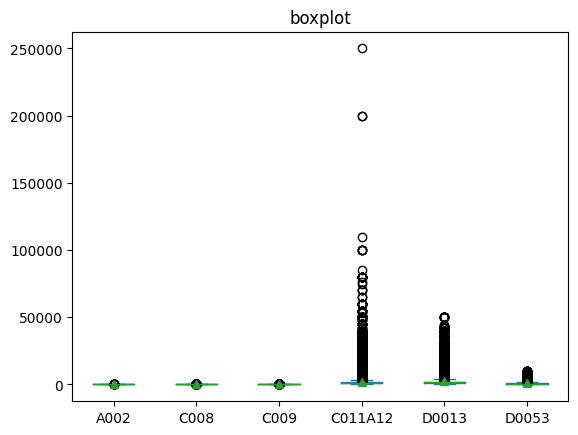

In [21]:
ax = result_df[[
    'A002',     # age
    'C008',     # How many hours a week did you normally work?
    'C009',     # How many hours did you actually work last week?
    'C011A12',  # income in cash
    'D0013',    # Sum of the amounts received?
    'D0053'     # Sum of the amounts received?
    ]].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

### gender

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


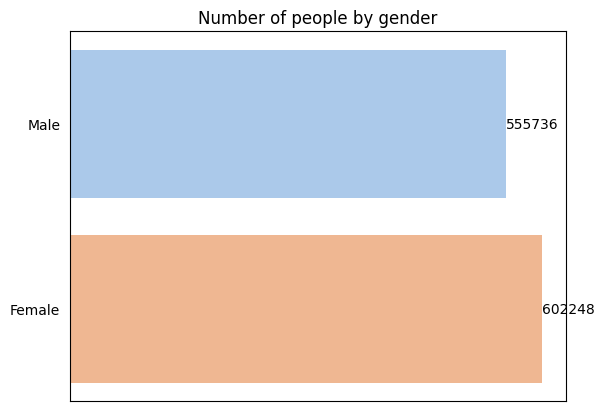

In [22]:
ax = sns.countplot(data=result_df, y='A003', hue='A003', palette='pastel')

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of people by gender')
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_yticks([0, 1])
ax.set_yticklabels(['Male', 'Female'])

plt.show()

In [23]:
# group by covid results
gender_g = result_df \
    .melt(id_vars='A003', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A003', 'category']).size().unstack(fill_value=0) \
    .reset_index()

gender_g

category,A003,1.0,2.0,3.0,4.0,9.0,nan
0,1,11575,36396,234,1036,18,1617949
1,2,14228,41503,378,1364,19,1749252


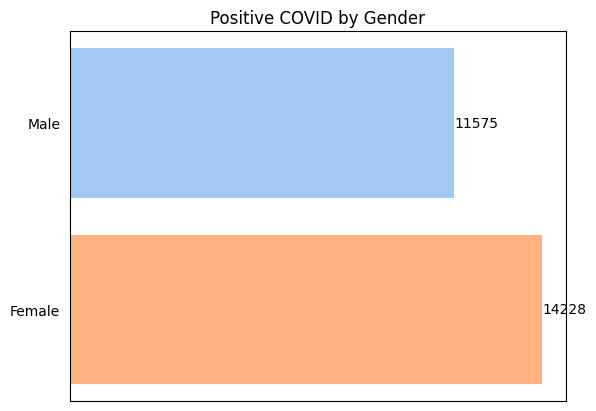

In [24]:
# define palette
palette = sns.color_palette('pastel', n_colors=len(gender_g['A003'].unique()))

# order by column '1.0' desc
gender_g_sorted = gender_g.sort_values(by='1.0', ascending=False)

# reorder the color palette to match the order of the data
# create a dictionary of colors associated with the categories
color_dict = dict(zip(gender_g['A003'], palette))

# reorder the colors to match the order of the data
colors_sorted = [color_dict[gender] for gender in gender_g_sorted['A003']]

# graph
fig, ax = plt.subplots()
bars = ax.barh(gender_g_sorted['A003'], gender_g_sorted['1.0'], color=colors_sorted)

# labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# adjust
plt.title('Positive COVID by Gender')

ax.set_yticks(gender_g_sorted['A003'])
# ax.set_yticklabels(gender_g_sorted['A003'])
ax.set_yticklabels(['Female', 'Male'])
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[])

ax.set(xlabel=None)
ax.set(ylabel=None)

plt.show()


### age

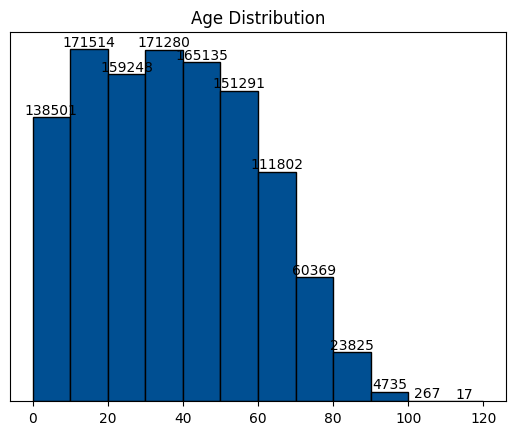

In [25]:
# bins each 10 years
bins = np.arange(result_df['A002'].min(), result_df['A002'].max() + 10, 10)

# histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(result_df['A002'], bins=bins, edgecolor='black', color='#004f92')

# labels each bar
for patch in patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')

# remove y labels
ax.set_yticklabels([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', left=False)

plt.show()



In [26]:
age_g = result_df \
    .melt(id_vars='A002', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A002', 'category']).size().unstack(fill_value=0) \
    .reset_index()

# age_g

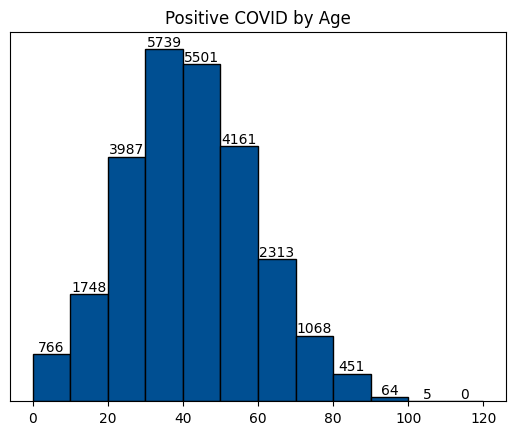

In [27]:
# age x covid
# define bins each 10 years
bins = np.arange(age_g['A002'].min(), age_g['A002'].max() + 10, 10)

# histogram
fig, ax = plt.subplots()
n, bin_edges, patches = ax.hist(age_g['A002'], bins=bins, weights=age_g['1.0'], edgecolor='black', color='#004f92')

# labels
for patch in patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# adjust
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Positive COVID by Age')

# remove label
ax.set_yticklabels([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', left=False)

plt.show()


### home situation

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


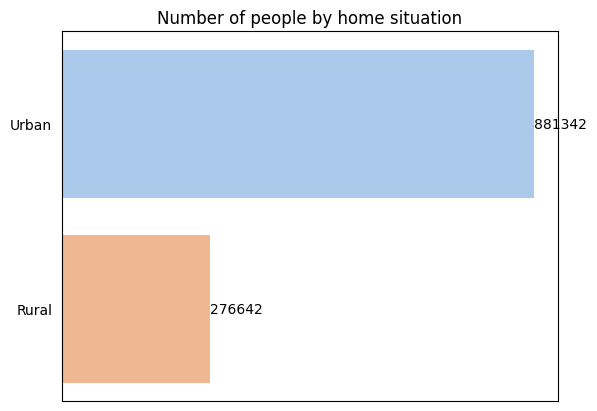

In [28]:
ax = sns.countplot(data=result_df, y='V1022', hue='V1022', palette='pastel')

# labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of people by home situation')

ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
# ax.set_xlabel('Home situation')
ax.set_xticks([0, 1])
ax.set(xticklabels=[])
# ax.set(yticklabels=[])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Urban', 'Rural'])

plt.show()

In [29]:
home_g = result_df \
    .melt(id_vars='V1022', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['V1022', 'category']).size().unstack(fill_value=0) \
    .reset_index()

home_g

category,V1022,1.0,2.0,3.0,4.0,9.0,nan
0,1,22494,67823,546,2116,27,2551020
1,2,3309,10076,66,284,10,816181


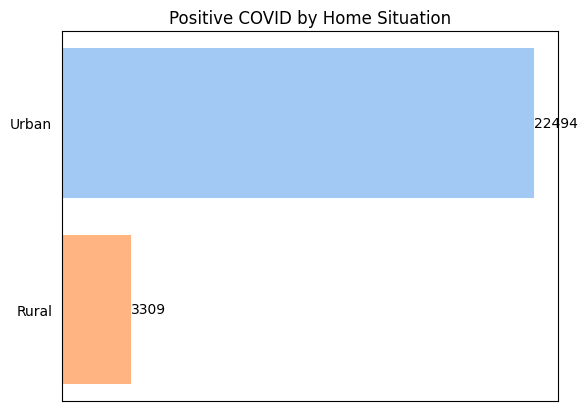

In [30]:
# define palette
palette = sns.color_palette('pastel', n_colors=len(home_g['V1022'].unique()))

# order by column '1.0' de forma decrescente
home_g_sorted = home_g.sort_values(by='1.0', ascending=True)

# reorder the color palette to match the order of the data
# create a dictionary of colors associated with the categories
color_dict = dict(zip(home_g['V1022'], palette))

# Reordenar as cores para corresponder à ordem dos dados
colors_sorted = [color_dict[home] for home in home_g_sorted['V1022']]

fig, ax = plt.subplots()
bars = ax.barh(home_g_sorted['V1022'], home_g_sorted['1.0'], color=colors_sorted)

# labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# adjust graph
plt.title('Positive COVID by Home Situation')

ax.set_yticks(home_g_sorted['V1022'])
# ax.set_yticklabels(gender_g_sorted['A003'])
ax.set_yticklabels(['Rural', 'Urban'])

ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[])

ax.set(xlabel=None)
ax.set(ylabel=None)

plt.show()

### color or race

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

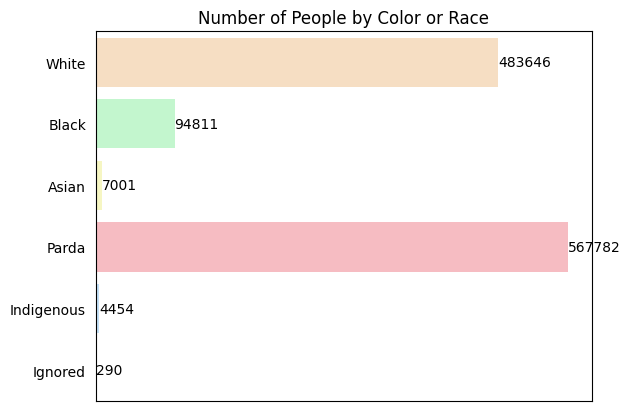

In [31]:
color_codes = {
    '1': '#FFB3BA',  # Rosa pastel
    '2': '#FFDFBA',  # Laranja pastel
    '3': '#FFFFBA',  # Amarelo pastel
    '4': '#BAFFC9',  # Verde pastel
    '5': '#BAE1FF',  # Azul pastel
    # '6': '#D5AAFF',  # Roxo pastel
    # '7': '#FFB3E6',  # Rosa claro
    # '8': '#FFECF0',  # Rosa muito claro
    '9': '#B2FFAB',  # Verde menta pastel
    # '10': '#B3E2F0', # Azul claro pastel
    # '11': '#E0BBE4'  # Lavanda pastel
}

# set order for the x-axis
desired_order = ['1', '2', '3', '4', '5', '9']

# define palette
# palette = sns.color_palette('pastel', n_colors=len(result_df['A004'].unique()))
palette = [color_codes[key] for key in desired_order]

fig, ax = plt.subplots()
sns.countplot(data=result_df, y='A004', hue='A004', palette=palette, order=desired_order, ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of People by Color or Race')
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(['White', 'Black', 'Asian','Parda', 'Indigenous', 'Ignored'])

plt.show()

In [32]:
race_g = result_df \
    .melt(id_vars='A004', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A004', 'category']).size().unstack(fill_value=0) \
    .reset_index()

race_g

category,A004,1.0,2.0,3.0,4.0,9.0,nan
0,1,9979,35665,227,1020,13,1404034
1,2,2197,6671,53,230,4,275278
2,3,118,561,1,22,0,20301
3,4,13277,34652,330,1113,18,1653956
4,5,218,337,1,14,2,12790
5,9,14,13,0,1,0,842


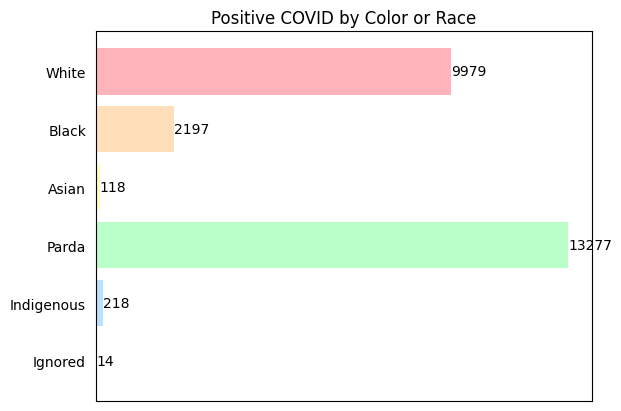

In [33]:
color_codes = {
    '1': '#FFB3BA',  # Rosa pastel
    '2': '#FFDFBA',  # Laranja pastel
    '3': '#FFFFBA',  # Amarelo pastel
    '4': '#BAFFC9',  # Verde pastel
    '5': '#BAE1FF',  # Azul pastel
    # '6': '#D5AAFF',  # Roxo pastel
    # '7': '#FFB3E6',  # Rosa claro
    # '8': '#FFECF0',  # Rosa muito claro
    '9': '#B2FFAB',  # Verde menta pastel
    # '10': '#B3E2F0', # Azul claro pastel
    # '11': '#E0BBE4'  # Lavanda pastel
}

# set order for the x-axis
desired_order = ['1', '2', '3', '4', '5', '9']

# define palette
# palette = sns.color_palette('pastel', n_colors=len(race_g['A004'].unique()))
palette = [color_codes[key] for key in desired_order]

# order column by '1.0' desc
race_g_sorted = race_g.sort_values(by='A004', ascending=False)

# reorder the color palette to match the order of the data
# create a dictionary of colors associated with the categories
color_dict = dict(zip(race_g['A004'], palette))

# reorder color
colors_sorted = [color_dict[home] for home in race_g_sorted['A004']]

fig, ax = plt.subplots()
bars = ax.barh(race_g_sorted['A004'], race_g_sorted['1.0'], color=colors_sorted)

# labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# adjust
plt.title('Positive COVID by Color or Race')

ax.set_yticks(race_g_sorted['A004'])
# ax.set_yticklabels(race_g_sorted['A004'])
ax.set_yticklabels(['Ignored', 'Indigenous', 'Parda', 'Asian', 'Black', 'White'])

ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[])

ax.set(xlabel=None)
ax.set(ylabel=None)

plt.show()

### education

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

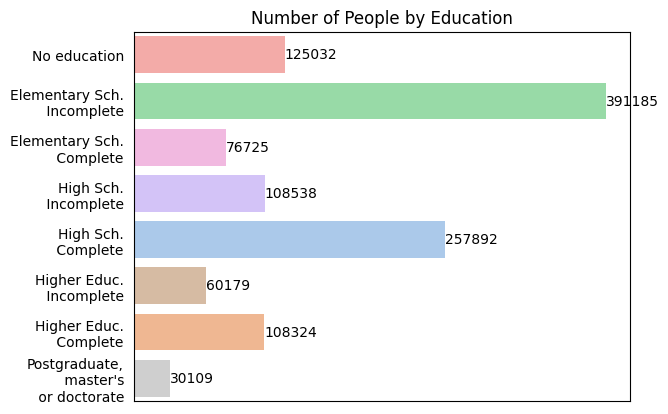

In [34]:
# set order for the x-axis
desired_order = ['1', '2', '3', '4', '5', '6', '7', '8']

# define palette
palette = sns.color_palette('pastel', n_colors=len(result_df['A005'].unique()))

fig, ax = plt.subplots()
sns.countplot(data=result_df, y='A005', hue='A005', palette=palette, order=desired_order, ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of People by Education')
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(['No education', 'Elementary Sch.\n Incomplete', 'Elementary Sch.\n Complete',
                    'High Sch.\n Incomplete', 'High Sch.\n Complete',
                    'Higher Educ.\n Incomplete', 'Higher Educ.\n Complete',
                    "Postgraduate,\n master's\n or doctorate"
                    ])

plt.show()

In [35]:
edu_g = result_df \
    .melt(id_vars='A005', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A005', 'category']).size().unstack(fill_value=0) \
    .reset_index()

edu_g

category,A005,1.0,2.0,3.0,4.0,9.0,nan
0,1,1156,3595,34,156,3,370152
1,2,5045,14818,78,522,11,1153081
2,3,1536,4181,34,123,1,224300
3,4,2078,5387,40,205,3,317901
4,5,7595,21258,197,630,9,743987
5,6,2147,6601,65,226,4,171494
6,7,4757,16259,116,401,6,303433
7,8,1489,5800,48,137,0,82853


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

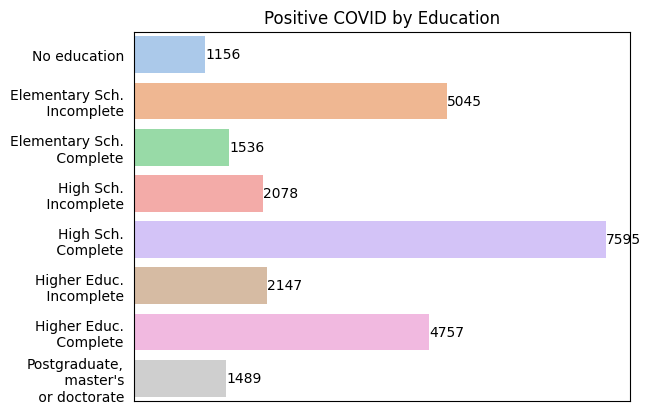

In [36]:
# filter
edu_g = edu_g[edu_g['1.0'] > 0]

# set order for the y-axis
desired_order = ['1', '2', '3', '4', '5', '6', '7', '8']

# define palette
palette = sns.color_palette('pastel', n_colors=len(edu_g['A005'].unique()))

fig, ax = plt.subplots()
bars = sns.barplot(data=edu_g, y='A005', x='1.0', hue='A005', palette=palette, order=desired_order, ax=ax)

# labels
for bar in bars.patches:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# adjust
plt.title('Positive COVID by Education')

ax.tick_params(left=False, bottom=False)
ax.set_xticks([])
ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(['No education', 'Elementary Sch.\n Incomplete', 'Elementary Sch.\n Complete',
                    'High Sch.\n Incomplete', 'High Sch.\n Complete',
                    'Higher Educ.\n Incomplete', 'Higher Educ.\n Complete',
                    "Postgraduate,\n master's\n or doctorate"
                    ])

plt.show()


### region

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

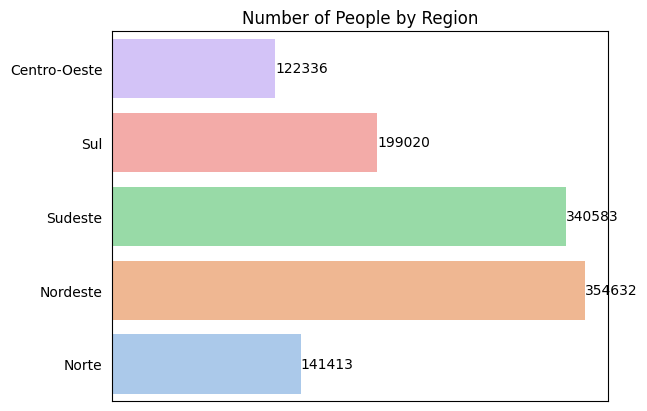

In [37]:
# set order for the x-axis
desired_order = ['Centro-Oeste', 'Sul', 'Sudeste', 'Nordeste', 'Norte']

# define palette
palette = sns.color_palette('pastel', n_colors=len(result_df['region'].unique()))

fig, ax = plt.subplots()
sns.countplot(data=result_df, y='region', hue='region', palette=palette, order=desired_order, ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of People by Region')
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)


plt.show()

In [38]:
# what is the distribution of the number of confirmed COVID-19 cases by region?
# 1 = positive; 2 = negative; 3 = inconclusive; 4 = Not yet received result; 5 = ignored; 6 = Not applicable
region_g = result_df \
    .melt(id_vars='region', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['region', 'category']).size().unstack(fill_value=0) \
    .reset_index()

region_g

category,region,1.0,2.0,3.0,4.0,9.0,nan
0,Centro-Oeste,3599,11805,73,358,5,351168
1,Nordeste,8548,22407,163,536,16,1032226
2,Norte,5586,8359,130,359,2,409803
3,Sudeste,5618,23114,183,745,10,992079
4,Sul,2452,12214,63,402,4,581925


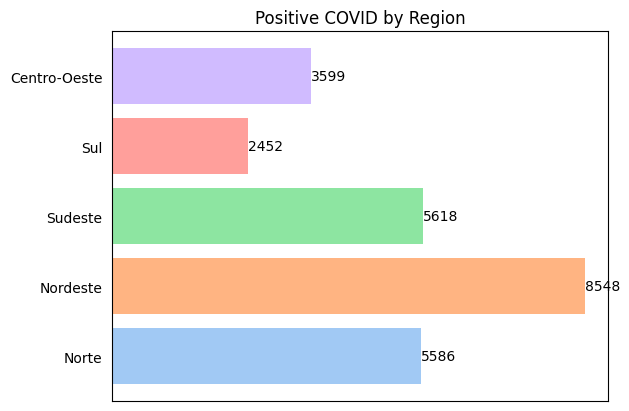

In [39]:
# set order
desired_order = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

# ordern df
region_g['region'] = pd.Categorical(region_g['region'], categories=desired_order, ordered=True)
region_g_sorted = region_g.sort_values('region')

# color
palette = sns.color_palette('pastel', n_colors=len(region_g_sorted['region'].unique()))

fig, ax = plt.subplots()
bars = ax.barh(region_g_sorted['region'], region_g_sorted['1.0'], color=palette)

# label
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# adjust
plt.title('Positive COVID by Region')

ax.set_yticks(range(len(region_g_sorted['region'])))
ax.set_yticklabels(region_g_sorted['region'])

ax.set_xticks([])
ax.set(xlabel=None)
ax.tick_params(left=False)

plt.show()


### income

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

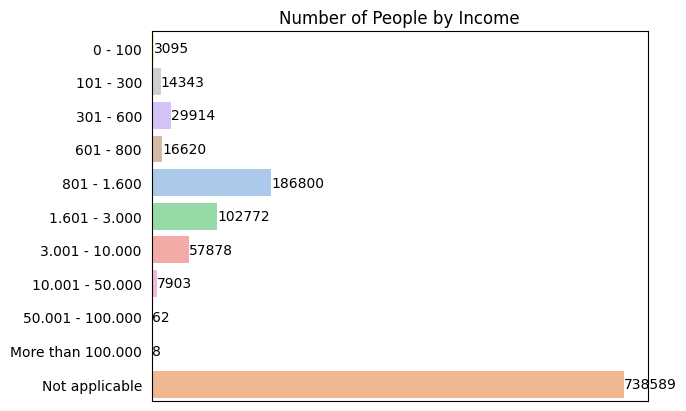

In [40]:
# set order for the x-axis
desired_order = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', 'nan']

# define palette
palette = sns.color_palette('pastel', n_colors=len(result_df['C01011'].unique()))

fig, ax = plt.subplots()
sns.countplot(data=result_df, y='C01011', hue='C01011', palette=palette, order=desired_order, ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of People by Income')
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_yticklabels(['0 - 100',
                    '101 - 300',
                    '301 - 600',
                    '601 - 800',
                    '801 - 1.600',
                    '1.601 - 3.000',
                    '3.001 - 10.000',
                    '10.001 - 50.000',
                    '50.001 - 100.000',
                    'More than 100.000',
                    'Not applicable'
                    ])

plt.show()


In [41]:
# what is the distribution between income level and the incidence of confirmed COVID-19 cases?
'''
0: 0 - 100
1: 101 - 300
2: 301 - 600
3: 601 - 800
4: 801 - 1.600
5: 1.601 - 3.000
6: 3.001 - 10.000
7: 10.001 - 50.000
8: 50.001 - 100.000
9: More than 100.000
NaN:	Not applicable
'''
income_g = result_df \
    .melt(id_vars='C01011', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['C01011', 'category']).size().unstack(fill_value=0) \
    .reset_index()

income_g

category,C01011,1.0,2.0,3.0,4.0,9.0,nan
0,0.0,46,120,3,6,0,9110
1,1.0,220,606,6,20,1,42176
2,2.0,486,1547,11,64,0,87634
3,3.0,311,915,9,30,0,48595
4,4.0,6045,18111,134,566,8,535536
5,5.0,4196,13005,83,324,4,290704
6,6.0,3054,11364,84,234,5,158893
7,7.0,578,2554,13,41,0,20523
8,8.0,9,34,0,0,0,143
9,9.0,1,1,0,0,0,22


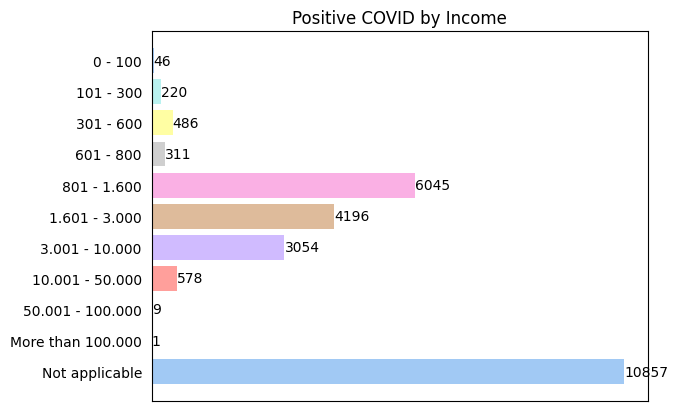

In [42]:
# define order
desired_order = [np.nan, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]

# replace NaN values with a special temporary marker
income_g['C01011'] = income_g['C01011'].fillna('NaN')

# create a categorical column with the desired order
income_g['C01011'] = pd.Categorical(income_g['C01011'], categories=[str(x) for x in desired_order], ordered=True)

# order data
income_g_sorted = income_g.sort_values(by='C01011')

# define palette
palette = sns.color_palette('pastel', n_colors=len(income_g['C01011'].unique()))

fig, ax = plt.subplots()
bars = ax.barh(income_g_sorted['C01011'].astype(str), income_g_sorted['1.0'], color=palette)

# labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# adjust
plt.title('Positive COVID by Income')

ax.set_xticklabels([])

ax.set(xlabel=None, ylabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_yticks(income_g_sorted['C01011'].astype(str))
# ax.set_yticklabels(income_g_sorted['C01011'].astype(str))

ax.set_yticklabels([
                    'Not applicable',
                    'More than 100.000',
                    '50.001 - 100.000',
                    '10.001 - 50.000',
                    '3.001 - 10.000',
                    '1.601 - 3.000',
                    '801 - 1.600',
                    '601 - 800',
                    '301 - 600',
                    '101 - 300',
                    '0 - 100'
                    ])

plt.show()

### healthcare establishment

In [43]:
covid_symptoms = ['B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113']

result_df['had_symptom'] = result_df[covid_symptoms].apply(lambda row: '1' in row.values, axis=1)

# result_df[['B002', 'had_symptom']]

<ipython-input-43-08ef69eb836e>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['had_symptom'] = result_df[covid_symptoms].apply(lambda row: '1' in row.values, axis=1)


In [44]:
# people who had symptoms and did (or did not) seek medical attention
# 1: yes; 2: no; 3: ignored; 9: not applicable

no_med = result_df \
    .melt(id_vars='B002',
          value_vars=['had_symptom']
          , var_name='source', value_name='category') \
    .groupby(['B002', 'category']).size().unstack(fill_value=0) \
    .reset_index()

no_med

category,B002,False,True
0,1.0,0,15180
1,2.0,0,49641
2,9.0,0,25
3,nan,1093138,0


In [45]:
print(f"Only {round(no_med.iloc[0, 2] / (no_med.iloc[0, 2] + no_med.iloc[1, 2] + no_med.iloc[2, 2]), 2) * 100}% of people who had any symptoms seek medical attention at healthcare establishment.")

Only 23.0% of people who had any symptoms seek medical attention at healthcare establishment.


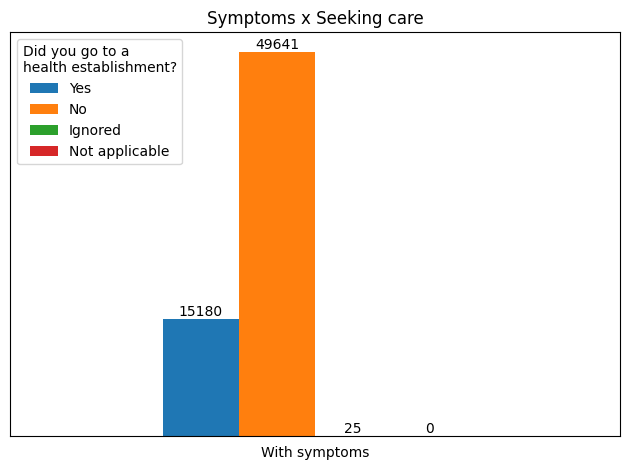

In [46]:
no_med_filtered = no_med[['B002', True]].set_index('B002')

# graphs
fig, ax = plt.subplots()

# bar graph
no_med_filtered.T.plot(kind='bar', ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# labels
ax.set_title('Symptoms x Seeking care')

ax.set(xlabel=None)
ax.tick_params(bottom=False, left=False)

# modify legend
handles, labels = ax.get_legend_handles_labels()

new_labels = ['Yes', 'No', 'Ignored', 'Not applicable']
ax.legend(handles=handles, labels=new_labels, title='Did you go to a \nhealth establishment?', loc='upper left')

plt.xticks(rotation=0)
ax.set_xticklabels(['With symptoms'])
ax.set_yticklabels([])

# adjusts the layout to avoid overlap
plt.tight_layout()

plt.show()


### covid test

In [47]:
# people who had 1 or more symptoms and were (or were not) tested

no_test = result_df \
    .melt(id_vars='B008',
          value_vars=['had_symptom'],
          var_name='source', value_name='category') \
    .groupby(['B008', 'category']).size().unstack(fill_value=0) \
    .reset_index()

no_test

category,B008,False,True
0,1,81808,12709
1,2,1006289,52093
2,9,5041,44


In [48]:
print(f"{round(no_test.iloc[0, 2] / (no_test.iloc[0, 2] + no_test.iloc[1, 2] + no_test.iloc[2, 2]), 2) * 100}% of who had any symptom did the covid test.")

20.0% of who had any symptom did the covid test.


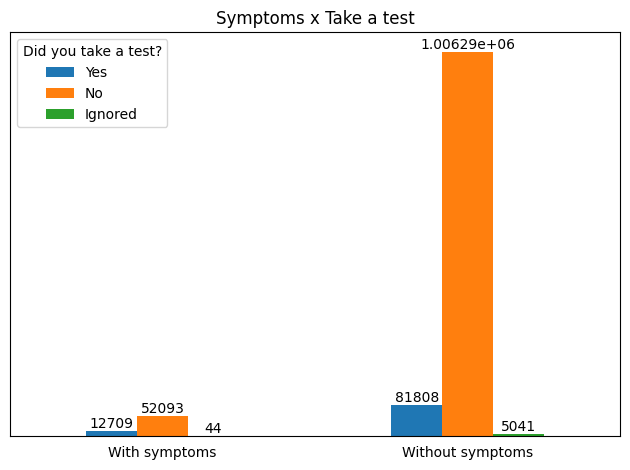

In [49]:
no_test_filtered = no_test[['B008', True, False]].set_index('B008')

# graph
fig, ax = plt.subplots()

# bar graph
no_test_filtered.T.plot(kind='bar', ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# labels
ax.set_title('Symptoms x Take a test')

ax.set(xlabel=None)
ax.tick_params(bottom=False, left=False)

# legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Yes', 'No', 'Ignored']
ax.legend(handles=handles, labels=new_labels, title='Did you take a test?', loc='upper left')

plt.xticks(rotation=0)
ax.set_xticklabels(['With symptoms', 'Without symptoms'])
ax.set_yticklabels([])

# adjusts the layout to avoid overlap
plt.tight_layout()

plt.show()

### health insurance

In [50]:
# had healthcare? 1: yes; 2: no; 9: ignored
result_df.groupby('B007')['B007'].count()

,B007
B007,
1,259158
2,893859
9,4967


In [51]:
# people who had 1 or more symptoms and have healthcare plan
no_healthcare = result_df \
    .melt(id_vars='B007',
          value_vars=['had_symptom'],
          var_name='source', value_name='category') \
    .groupby(['B007', 'category']).size().unstack(fill_value=0) \
    .reset_index()

no_healthcare

category,B007,False,True
0,1,243906,15252
1,2,844321,49538
2,9,4911,56


In [52]:
print(round(1 - (no_test.iloc[0, -1] / no_healthcare.iloc[0, -1]), 2) * 100, "% even with symptoms and health insurance, didn't take the test.")

17.0 % even with symptoms and health insurance, didn't take the test.


💡 Investigate possible lack of access to Covid testing.

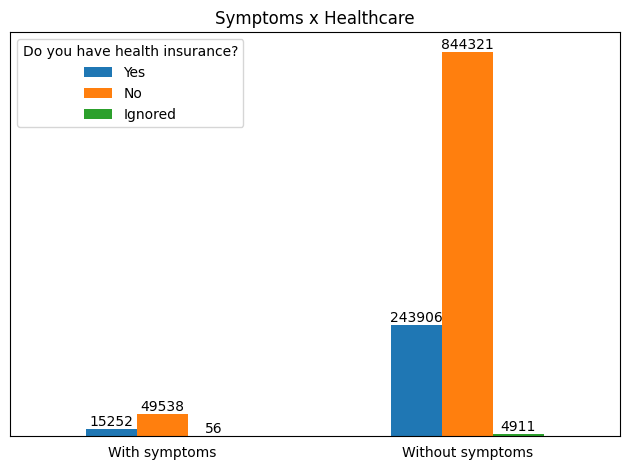

In [53]:
no_healthcare_filtered = no_healthcare[['B007', True, False]].set_index('B007')

# graph
fig, ax = plt.subplots()

# bar graph
no_healthcare_filtered.T.plot(kind='bar', ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# labels
ax.set_title('Symptoms x Healthcare')

ax.set(xlabel=None)
ax.tick_params(bottom=False, left=False)

# legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Yes', 'No', 'Ignored']
ax.legend(handles=handles, labels=new_labels, title='Do you have health insurance?', loc='upper left')

plt.xticks(rotation=0)
ax.set_xticklabels(['With symptoms', 'Without symptoms'])
ax.set_yticklabels([])

# adjusts the layout to avoid overlap
plt.tight_layout()

plt.show()

In [54]:
result_df.query('had_symptom == True').pivot_table(index='B007', columns='B008', aggfunc='size', fill_value=0)

B008,1,2,9
B007,,,
1,4225,11022,5
2,8469,41058,11
9,15,13,28


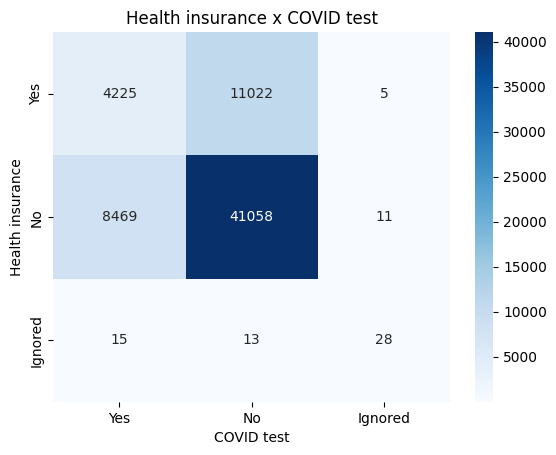

In [55]:
# count table
pivot_table = result_df.query('had_symptom == True').pivot_table(index='B007', columns='B008', aggfunc='size', fill_value=0)

plt.figure()
ax = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Health insurance x COVID test')
plt.xlabel('COVID test')
plt.ylabel('Health insurance')

ax.set_xticklabels(['Yes', 'No', 'Ignored'], rotation=0)
ax.set_yticklabels(['Yes', 'No', 'Ignored'])

plt.show()


### symptoms

In [56]:
covid_result = ['B009B', 'B009D', 'B009F']

result_df['positive_test'] = result_df[covid_result].apply(lambda row: '1.0' in row.values, axis=1)

result_df['positive_test'].sample(5)

<ipython-input-56-72f839207d29>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['positive_test'] = result_df[covid_result].apply(lambda row: '1.0' in row.values, axis=1)


,positive_test
260342,False
277746,False
774417,False
984929,False
343822,False


In [57]:
columns_to_select = ['had_symptom', 'positive_test', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113']
filtered_df = result_df[columns_to_select]

filtered_df = filtered_df.query('had_symptom == True & positive_test == True')

filtered_df.sample(5)

,had_symptom,positive_test,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113
92954,True,True,1,1,2,2,2,2,2,1,2,2,2,2,2
988157,True,True,2,2,2,2,2,2,2,2,1,2,2,2,2
792908,True,True,2,2,2,1,2,2,2,2,2,2,2,2,2
1157715,True,True,2,2,2,2,1,2,2,2,1,2,2,1,2
27550,True,True,1,1,2,1,2,2,2,2,2,2,2,2,2


In [58]:
filtered_df[covid_symptoms].apply(lambda col: (col == '1'))

,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113
271,True,True,True,True,True,True,True,True,True,True,True,True,True
436,False,True,False,False,False,True,False,True,True,False,False,False,False
437,False,True,False,False,False,False,False,False,True,False,False,False,False
464,False,False,False,True,False,False,False,False,False,True,True,True,True
465,False,False,True,True,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157966,True,True,True,True,True,True,True,True,True,False,True,True,False
1157967,True,True,True,True,True,True,True,True,True,True,True,True,False
1157979,True,True,True,False,True,False,False,True,True,False,False,False,False
1157980,True,True,True,False,True,False,False,True,True,False,False,False,False


In [59]:
# most common symptoms reported by people with positive cases
count_ones = filtered_df[covid_symptoms].apply(lambda col: (col == '1').sum())

count_ones_df = pd.DataFrame(count_ones, columns=['Total']).sort_values(by='Total', ascending=True)

count_ones_df

,Total
B00113,1226
B0017,1269
B0016,1289
B00110,1311
B0014,1684
B0018,1897
B0013,2096
B0019,2212
B00111,2348
B00112,2478


<Figure size 1200x600 with 0 Axes>

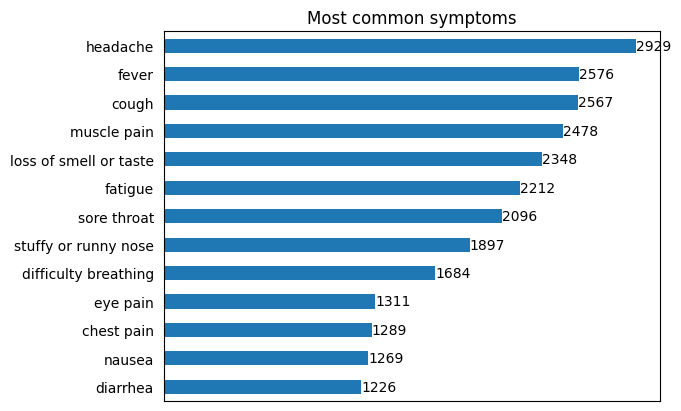

In [60]:
plt.figure(figsize=(12, 6))
ax=count_ones_df.plot(kind='barh', legend=False)

plt.title('Most common symptoms')
# labels
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height()/2,
            f'{p.get_width()}',
            va='center', ha='left')

ax.set(xlabel=None)
ax.set_xticklabels([])
ax.tick_params(bottom=False, left=False)

ax.set_yticklabels([
'diarrhea',               # 'B00113'
'nausea',                 # 'B0017'
'chest pain',             # 'B0016'
'eye pain',               # 'B00110'
'difficulty breathing',   # 'B0014'
'stuffy or runny nose',   # 'B0018'
'sore throat',            # 'B0013'
'fatigue',                # 'B0019'
'loss of smell or taste', # 'B00111'
'muscle pain',            # 'B00112'
'cough',                  # 'B0012'
'fever',                  # 'B0011'
'headache',               # 'B0015'
                    ])

plt.show()

## Download

In [ ]:
result_df.sample(5)

,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,...,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006,region,had_symptom,positive_test
132598,27,nan,nan,10,1,7,3,2752020,270006266,2,...,1,1,1,2,1,1,1.0,Nordeste,False,True
99956,24,nan,nan,13,4,7,3,2453020,240016610,2,...,1,1,1,2,1,1,1.0,Nordeste,False,False
407487,14,14.0,nan,7,4,8,4,1410011,140004066,1,...,1,1,1,1,1,1,1.0,Norte,False,False
263988,35,nan,nan,4,2,7,3,3551021,350233432,2,...,1,1,1,1,1,1,1.0,Sudeste,False,False
1120500,50,nan,nan,6,4,9,5,5051010,500031208,1,...,1,1,1,1,1,1,1.0,Centro-Oeste,False,False


In [ ]:
result_df.shape

(1157984, 109)

In [ ]:
#  result_df.to_csv('/content/drive/MyDrive/test/einstein/data/COVID2020_EDA.csv', index=False)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/test/einstein/data/COVID2020_EDA.csv')
# df.head()

In [ ]:
# sample

sample_df = result_df.sample(n=5000, random_state=1)

In [ ]:
# check month distribution
sample_df.groupby('V1013')['V1013'].count()

,V1013
V1013,
7,1641
8,1607
9,1752


In [ ]:
# sample_df.to_csv('/content/drive/MyDrive/test/einstein/data/COVID2020_EDA_sample.csv', index=False)

In [ ]:
# select columns for dataviz tool
lst = [
    'UF', 'CAPITAL', 'V1012', 'V1013', 'Estrato', 'UPA', 'V1022', 'V1023',                  # geographical variables
    'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006',          # sociographics
    'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019',        # symptoms
    'B00110', 'B00111', 'B00112', 'B00113',                                                 # symptoms
    'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037',                  # health provision
    'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046',                                   # healthcare establishment
    'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F',   # covid treatment
    'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106',                                   # diagnosis previous illness
    'C001', 'C002', 'C006', 'C007', 'C007B', 'C007C', 'C007D', 'C01011', 'C01012', 'C014',  # work situation
    'D0011', 'D0013', 'D0021', 'D0031', 'D0041', 'D0051', 'D0053', 'D0061', 'D0071',        # income
    'F001', 'F002A1', 'F002A2', 'F002A3', 'F002A4', 'F002A5',                               # home
    'region', 'had_symptom', 'positive_test'                                                # new variables
    ]

dataviz_df = result_df[[*lst]]

In [ ]:
dataviz_df.to_csv('/content/drive/MyDrive/test/einstein/data/COVID2020_EDA_dataviz.csv', index=False)